In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split 
import numpy as np
import scipy.stats as stats
import torch.nn as nn
import torch.nn.functional as F
import matplotlib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time


matplotlib.rcParams.update({'font.size':12}) 

In [2]:
data = pd.read_csv("winequality-red.csv", sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('residual sugar')

# zscore
for col in cols2zscore:
    meanval = np.mean(data[col])
    stdev = np.std(data[col], ddof=1)
    data[col] = (data[col] - meanval)/stdev

# more compact way to normalize 
#data[colszscore] = data[colszscore].apply(stats.zscore)


data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.554936e-16,1.688594e-16,-1.066481e-16,2.538806,3.554936e-16,-6.221137e-17,2.666202e-17,-3.469617e-14,2.861723e-15,6.665504e-16,7.109871e-17,6.221137e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.409928,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,0.900000,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,1.900000,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,2.200000,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,2.600000,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,15.500000,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,2.927275e+00


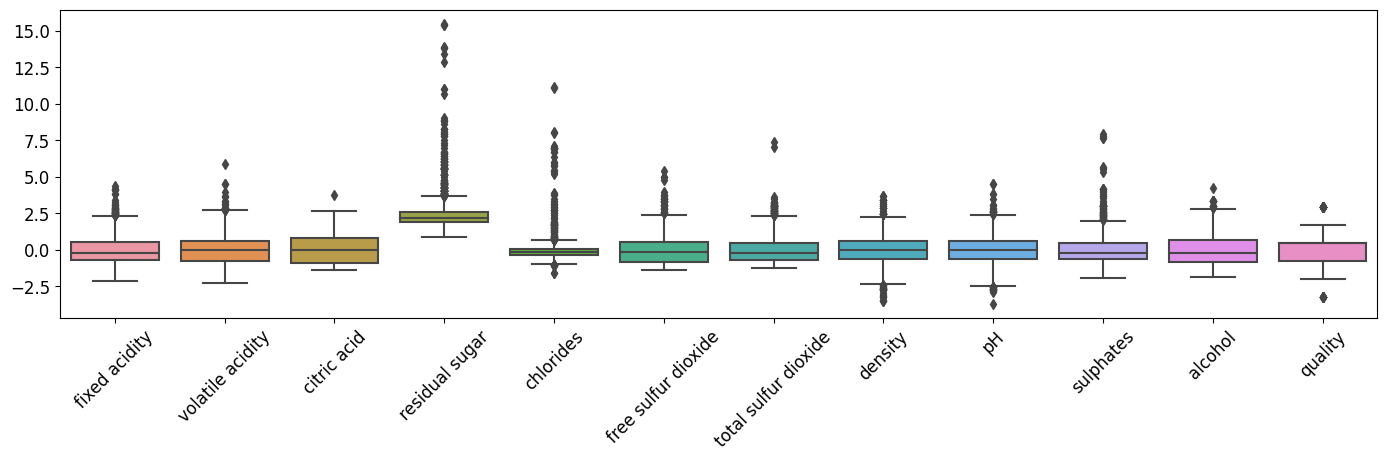

In [4]:
fig, ax = plt.subplots(1, figsize = (17, 4))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

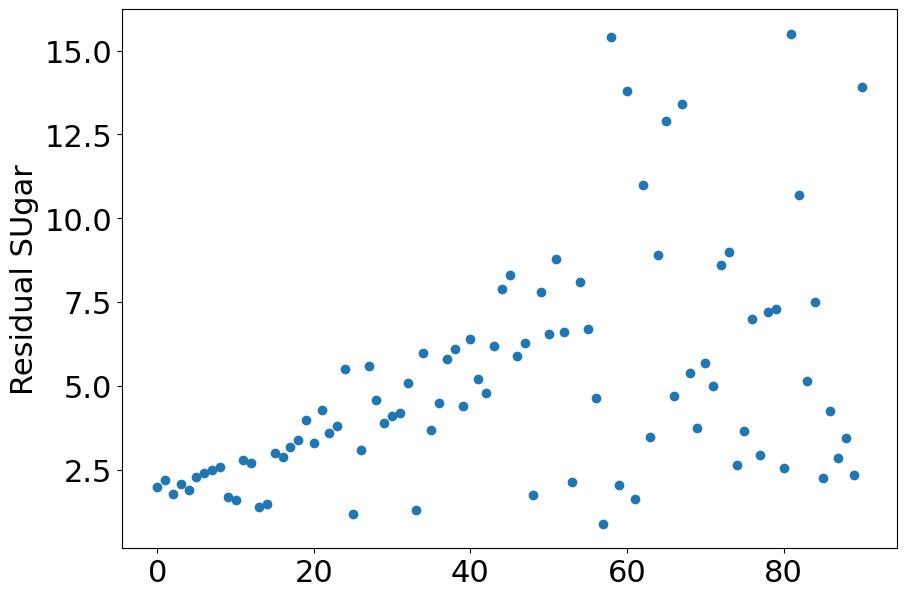

In [5]:
# distribution quality values
fig = plt.figure(figsize = (10,7))
plt.rcParams.update({'font.size':22})

counts = data['residual sugar'].value_counts()
plt.plot(list(counts.keys()),'o')

plt.ylabel('Residual SUgar')
plt.show()

In [6]:
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data['residual sugar'].values).float()

print(dataT.shape)
print(labels.shape)

labels = labels[:,None]
print(labels.shape)

torch.Size([1599, 11])
torch.Size([1599])
torch.Size([1599, 1])


In [7]:
# training and testing split
train_, test_, train_labels, test_labels = train_test_split(dataT, labels, test_size = 0.2)

train_data = TensorDataset(train_, train_labels)
test_data = TensorDataset(test_, test_labels)

batchsize = 64
train_loader = DataLoader(train_data, batch_size = batchsize, shuffle = True)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [8]:
for X, y in train_loader:
    print(X.shape,y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([63, 11]) torch.Size([63, 1])


In [9]:
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        # input layer
        self.input = nn.Linear(11,64)

        ### hidden layers 
        self.fc1 = nn.Linear(64,32)
        self.fc2 = nn.Linear(32,20)

        # output layer
        self.output = nn.Linear(20,1)

    def forward(self,x):
        x = F.relu(self.input(x))

    
        # hidden layer 1
        x = F.relu(self.fc1(x))

        # hidden layer 2
        x = F.relu(self.fc2(x))
        
        
        return self.output(x)






In [10]:
epochs = 5000
def trainTheModel():

    # loss function and optimizer
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(winenet.parameters(),lr=.1, weight_decay = 0.01)

    trainloss = torch.zeros(epochs)
    testloss  = torch.zeros(epochs)

    for epochi in range(epochs):


        winenet.train()
        batchLoss = []

        for X, y in train_loader:
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


            batchLoss.append(loss.item())
        

        trainloss[epochi] = np.mean(batchLoss)
        winenet.eval()
        X,y = next(iter(test_loader)) # extract X,y from test dataloader
        with torch.no_grad(): # deactivates autograd
            yHat = winenet(X)
        testloss[epochi] = lossfun(yHat,y).item()
        
    return trainloss, testloss







In [11]:

# train a model NO BATCHNORM
winenet = ANNwine()
trainloss, testloss = trainTheModel()



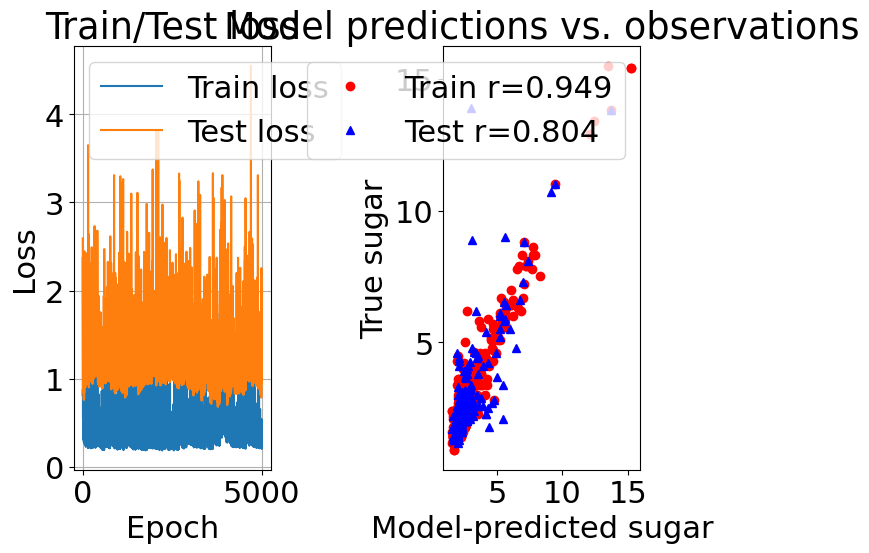

In [12]:
# plot some results
fig,ax = plt.subplots(1,2,figsize=(7,6))

ax[0].plot(trainloss,label='Train loss')
ax[0].plot(testloss,label='Test loss')
ax[0].set_title('Train/Test loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid()


# show predictions and real values
yHatTrain = winenet(train_)
yHatTest  = winenet(test_)

ax[1].plot(yHatTrain.detach(),train_labels,'ro')
ax[1].plot(yHatTest.detach(),test_labels,'b^')
ax[1].set_xlabel('Model-predicted sugar')
ax[1].set_ylabel('True sugar')
ax[1].set_title('Model predictions vs. observations')

# correlations between predictions and outputs
corrTrain = np.corrcoef(yHatTrain.detach().T,train_labels.T)[1,0]
corrTest  = np.corrcoef(yHatTest.detach().T, test_labels.T)[1,0]
ax[1].legend([ f'Train r={corrTrain:.3f}',f'Test r={corrTest:.3f}' ])
plt.tight_layout()
plt.show()

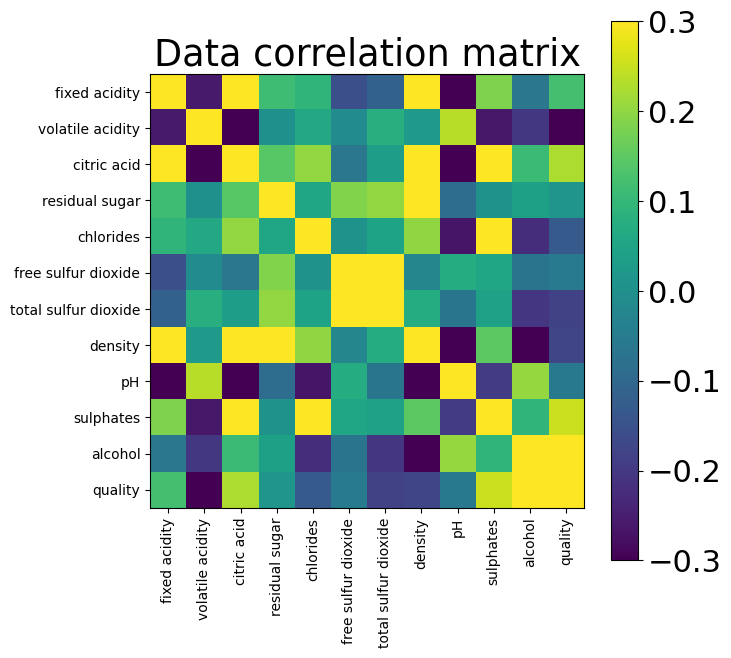

In [13]:

# Inspect the correlation matrix
fig = plt.figure(figsize=(7,7))
   

plt.imshow(np.corrcoef(data.T),vmin=-.3,vmax=.3)
plt.xticks(range(len(data.keys())),labels=data.keys(),rotation=90,fontsize = 10)
plt.yticks(range(len(data.keys())),labels=data.keys(),fontsize = 10)
plt.colorbar()
plt.title('Data correlation matrix')
plt.show()